# Homework 4

## Exercise 2

### b.

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
x0_raw = np.loadtxt('data/class0.txt')
x1_raw = np.loadtxt('data/class1.txt')
X0 = np.bmat([x0_raw, np.ones((50, 1))])
X1 = np.bmat([x1_raw, np.ones((50, 1))])
X = np.bmat([[X0], [X1]])
y = np.concatenate((np.zeros(X0.shape[0]), np.ones(X1.shape[0])))
N = X.shape[0]

theta = cp.Variable(3)
lambd = 0.0001
objective = cp.Minimize(-(np.sum(X1, axis=0)@theta - cp.sum(cp.log_sum_exp(cp.hstack([np.zeros((N, 1)), cp.reshape(X@theta, (N, 1))]), axis=1)))/N + lambd*cp.norm(theta))
cp.Problem(objective).solve()
theta = theta.value
print('theta =', theta)

theta = [  6.39387967   3.72746349 -28.09103567]


### c.

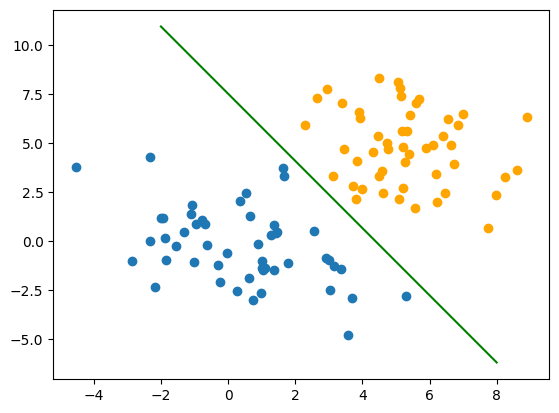

In [3]:
w = theta[0:-1]
w0 = theta[-1]
x1_db = np.arange(-2, 9)
x2_db = (-w0 - w[0]*x1_db)/w[1]

plt.figure()
plt.scatter(x0_raw[:,0].squeeze(), x0_raw[:,1].squeeze())
plt.scatter(x1_raw[:,0].squeeze(), x1_raw[:,1].squeeze(), color='orange')
plt.plot(x1_db, x2_db, color='green')
plt.show()

### d.

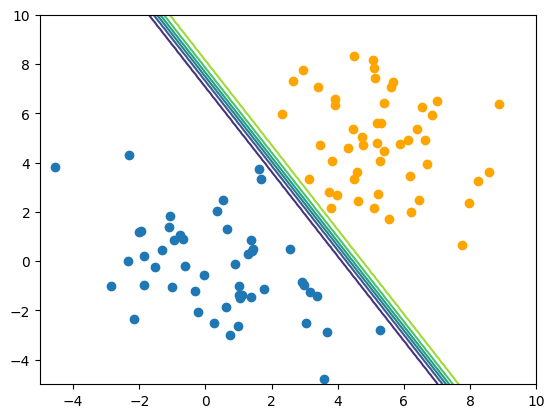

In [4]:
x_mesh = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x_contour = np.hstack((x_mesh[0].reshape((-1, 1)), x_mesh[1].reshape((-1, 1))))
p = 1/(1 + np.exp(-(np.dot(x_contour, w) + w0))).reshape((100, 100))

plt.figure()
plt.scatter(x0_raw[:,0].squeeze(), x0_raw[:,1].squeeze())
plt.scatter(x1_raw[:,0].squeeze(), x1_raw[:,1].squeeze(), color='orange')
plt.contour(x_mesh[0], x_mesh[1], p)
plt.show()

## Exercise 3

### a.

In [5]:
def k(x_m, x_n, h=1):
    return np.exp(-np.linalg.norm(x_m - x_n)**2/h)

K = np.empty((N, N))
for i in range(N):
    for j in range(N):
        K[i, j] = k(X[i], X[j])

print('K =', K[47:52, 47:52])

K = [[1.00000000e+00 5.05310080e-25 6.06536602e-20 4.65474122e-29
  4.06890793e-17]
 [5.05310080e-25 1.00000000e+00 3.95931666e-13 2.69357110e-33
  5.38775392e-12]
 [6.06536602e-20 3.95931666e-13 1.00000000e+00 2.30352619e-65
  3.78419625e-34]
 [4.65474122e-29 2.69357110e-33 2.30352619e-65 1.00000000e+00
  2.16278503e-06]
 [4.06890793e-17 5.38775392e-12 3.78419625e-34 2.16278503e-06
  1.00000000e+00]]


### b.

### c.

In [9]:
alpha = cp.Variable(N)
lambd = 0.0001
objective = cp.Minimize(-(y.reshape((1, N))@K@alpha - np.ones((1, N))@cp.log_sum_exp(cp.hstack([np.zeros((N, 1)), cp.reshape(K@alpha, (N, 1))]), axis=1))/N + lambd*cp.quad_form(alpha, K))
cp.Problem(objective).solve()
alpha = alpha.value
print('alpha =', alpha[0:2])

alpha = [-0.95245074 -1.21046707]


### d.

C:\Users\jonat\AppData\Local\Temp\ipykernel_37136\2900467978.py:12: RuntimeWarning: overflow encountered in exp
  p_kernel = 1/(1 + np.exp(-(np.dot(x_contour, w_kernel) + w0_kernel))).reshape((100, 100))


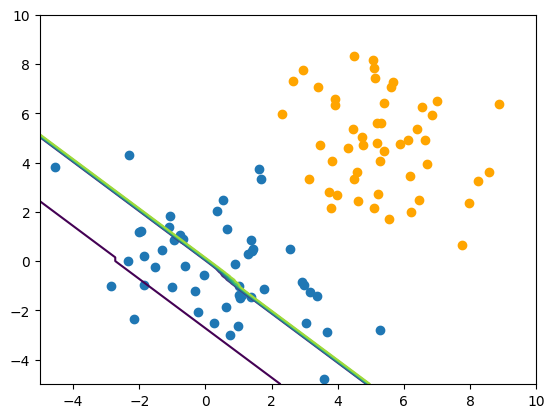

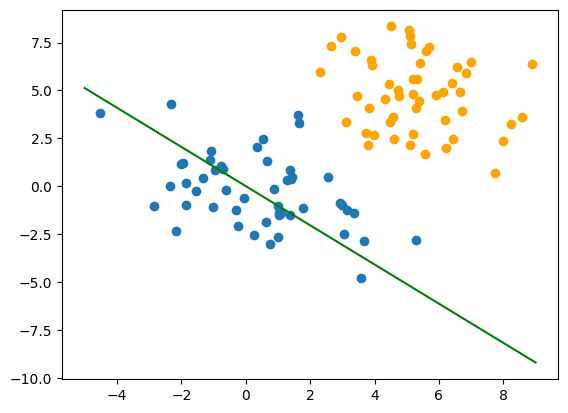

In [10]:
def reshape_dumb(a):
    out = np.empty(a.shape[1])
    for i in range(out.size):
        out[i] = a[0, i]
    return out

theta_kernel = reshape_dumb(np.dot(alpha, X))

w_kernel = theta_kernel[0:-1]
w0_kernel = theta_kernel[-1]

p_kernel = 1/(1 + np.exp(-(np.dot(x_contour, w_kernel) + w0_kernel))).reshape((100, 100))

plt.figure()
plt.scatter(x0_raw[:,0].squeeze(), x0_raw[:,1].squeeze())
plt.scatter(x1_raw[:,0].squeeze(), x1_raw[:,1].squeeze(), color='orange')
plt.contour(x_mesh[0], x_mesh[1], p_kernel)
plt.show()

x1_kernel_db = np.arange(-5, 10)
x2_kernel_db = (-w0_kernel - w_kernel[0]*x1_kernel_db)/w_kernel[1]

plt.figure()
plt.scatter(x0_raw[:,0].squeeze(), x0_raw[:,1].squeeze())
plt.scatter(x1_raw[:,0].squeeze(), x1_raw[:,1].squeeze(), color='orange')
plt.plot(x1_kernel_db, x2_kernel_db, color='green')
plt.show()

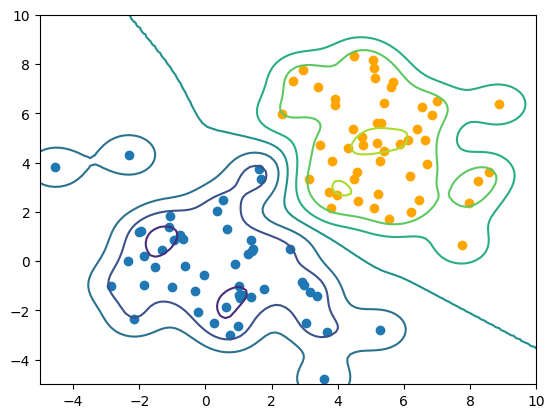

In [31]:
x_points = np.hstack([x_contour, np.ones((10000, 1))])
x_kernel_db = np.empty(100**2)
for i, x in enumerate(x_points):
    sum = 0
    for n, x_n in enumerate(X):
        sum += alpha[n]*k(x_n, x)
    x_kernel_db[i] = sum

    #print(np.vectorize(k)(X, np.full((100, 3), x)).shape)
    #print(np.dot(alpha, np.vectorize(k)(X, np.full((100, 3), x))))
x_kernel_db = x_kernel_db.reshape((100, 100))

plt.figure()
plt.scatter(x0_raw[:,0].squeeze(), x0_raw[:,1].squeeze())
plt.scatter(x1_raw[:,0].squeeze(), x1_raw[:,1].squeeze(), color='orange')
plt.contour(x_mesh[0], x_mesh[1], x_kernel_db)
plt.show()